# S06 T01: Tasca mètodes de mostreig

**Descripció**:

Aprèn a realitzar mostreig de les dades amb Python.

**Nivell 1**

- Exercici 1 :

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

# NBA Players

## Biometric, biographic and basic box score features from 1996 to 2019 season

Dataset file: [NBA Players](https://www.kaggle.com/justinas/nba-players-data?select=all_seasons.csv)

**Description**:

**Update 02-08-2021**: The data now includes 2020 season and metrics for 2019 have been updated.

**Update 08-03-2020**: The data now includes 2017, 2018 and 2019 seasons. Keep in mind that metrics like gp, pts, reb, etc. are not complete for 2019 season, as it is ongoing at the time of upload.

Context :
As a life-long fan of basketball I always wanted to combine my enthusiasm for the sport with passion for analytics. So, I utilized the NBA Stats API to pull together this data set. I hope it will prove to be as interesting to work with for you as it has been for me!

Content :
The data set contains over two decades of data on each player who has been part of an NBA teams' roster.  captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has basic box score statistics such as games played, average number of points, rebounds,It assists, etc.

The pull initially contained 52 rows of missing data. The gaps have been manually filled using data from Basketball Reference. I am not aware of any other data quality issues.

Analysis Ideas :
The data set can be used to explore how age/height/weight tendencies have changed over time due to changes in game philosophy and player development strategies. Also, it could be interesting to see how geographically diverse the NBA is and how oversees talents have influenced it. A longitudinal study on players' career arches can also be performed.

`Player` - Player name

`team_abbreviation` - team names

`age` - age of player

The variables are quite self explanatory until

`gp` - games played

`pts` - average pts per game

`reb` - rebounds per game

`ast` - assists per game

`net_rating` - Team’s point differential per 100 possessions while the player is on the court

`oreb_pct` - Percentage of available offensive rebounds the player grabbed while he was on the floor

`dreb_pct` - Percentage of available defensive rebounds the player grabbed while he was on the floor

`usg_pct` - Percentage of team plays used by the player while he was on the floor

`ts_pct` - Measure of the player’s shooting efficiency that takes into account free throws, 2 and 3 point shots

`ast_pct` - Percentage of teammate field goals the player assisted while he was on the floor

`season` - NBA season

In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

- Set pandas float_format with pandas set_option

In [152]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

1. Read the data as a pandas dataframe and display the first 5 rows

In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
all_seasons_df = pd.read_csv("./input/all_seasons.csv", index_col = 0)
all_seasons_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,...,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,...,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,...,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97


In [165]:
all_seasons_df.player_name.count()

11700

2. Display the number of rows and columns in the database.

In [6]:
all_seasons_df.shape

(11700, 21)

In [7]:
all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


- A simple random sample with n observations is generated.

In [9]:
simple_all_seasons_df = all_seasons_df.sample(n = 500)
simple_all_seasons_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1460,Wayne Turner,BOS,24.0,187.96,86.182480,Kentucky,USA,Undrafted,Undrafted,Undrafted,...,1.3,1.0,1.7,-1.2,0.026,0.053,0.124,0.231,0.192,1999-00
10129,Paul George,OKC,29.0,205.74,99.790240,Fresno State,USA,2010,1,10,...,28.0,8.2,4.1,8.2,0.033,0.173,0.285,0.583,0.173,2018-19
10920,Stephen Curry,GSW,32.0,190.50,83.914520,Davidson,USA,2009,1,7,...,20.8,5.2,6.6,-15.3,0.023,0.162,0.286,0.557,0.355,2019-20
8088,Joe Johnson,BKN,33.0,200.66,108.862080,Arkansas,USA,2001,1,10,...,15.8,3.4,2.7,1.1,0.022,0.102,0.224,0.564,0.148,2013-14
10289,Rondae Hollis-Jefferson,BKN,24.0,200.66,98.429464,Arizona,USA,2015,1,23,...,8.9,5.3,1.6,0.7,0.060,0.170,0.210,0.464,0.119,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,Tyus Edney,BOS,25.0,177.80,68.945984,UCLA,USA,1995,2,47,...,5.3,1.1,2.7,0.2,0.034,0.068,0.217,0.523,0.334,1997-98
2613,Art Long,SEA,29.0,205.74,114.758776,Cincinnati,USA,Undrafted,Undrafted,Undrafted,...,4.5,4.0,0.7,-0.1,0.132,0.173,0.163,0.506,0.063,2001-02
6367,Trevor Ariza,NOH,25.0,203.20,95.254320,UCLA,USA,2004,2,43,...,11.0,5.4,2.2,0.6,0.028,0.167,0.177,0.487,0.099,2010-11
5579,CJ Miles,UTA,22.0,198.12,102.965384,None,USA,2005,2,34,...,9.1,2.3,1.5,0.4,0.033,0.092,0.183,0.546,0.098,2008-09


In [10]:
simple_all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,500.000000,500.000000,500.000000,500.0000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,27.224000,200.086640,100.235302,52.7300,8.3404,3.554400,1.921200,-2.679000,0.052676,0.138654,0.185762,0.513394,0.135524
std,4.487996,9.061977,12.207614,24.8037,5.9305,2.473515,1.882934,10.264788,0.039043,0.062176,0.050221,0.086887,0.097241
min,19.000000,165.100000,60.327736,1.0000,0.0000,0.000000,0.000000,-88.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,91.625584,33.7500,3.7750,1.800000,0.600000,-6.600000,0.022000,0.097000,0.154000,0.479000,0.067750
50%,27.000000,200.660000,99.790240,60.0000,6.7500,3.000000,1.300000,-1.950000,0.040500,0.125000,0.181500,0.526000,0.108000
75%,30.000000,205.740000,108.862080,74.0000,11.6000,4.600000,2.425000,3.025000,0.078000,0.176000,0.219000,0.559000,0.180750
max,44.000000,223.520000,142.881480,82.0000,31.3000,15.000000,10.900000,33.900000,0.214000,0.455000,0.355000,1.064000,0.500000


- In order to generate a systematic random sample, we first obtain two random numbers to be used as "init" and "step" to pick the data from the new data set.

In [11]:
init = np.random.randint(1, 50)
step = np.random.randint(1, 50)

- Compute the length of the array

In [12]:
end  = len(all_seasons_df) 

In [13]:
systematic_all_seasons_df = all_seasons_df[init : end : step]
systematic_all_seasons_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
26,Matt Steigenga,CHI,27.0,200.66,102.058200,Michigan State,USA,1992,2,52,...,1.5,1.5,1.0,-19.8,0.000,0.167,0.341,0.307,0.333,1996-97
51,Michael Cage,PHI,35.0,205.74,112.490816,San Diego State,USA,1984,1,14,...,1.8,3.9,0.5,-12.0,0.097,0.193,0.062,0.475,0.053,1996-97
76,Jim McIlvaine,SEA,24.0,215.90,117.933920,Marquette,USA,1994,2,32,...,3.8,4.0,0.3,9.7,0.103,0.152,0.116,0.487,0.022,1996-97
101,Kevin Garnett,MIN,21.0,210.82,99.790240,None,USA,1995,1,5,...,17.0,8.0,3.1,2.8,0.077,0.166,0.215,0.537,0.139,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11576,Kevin Porter Jr.,HOU,21.0,193.04,92.079176,Southern California,USA,2019,1,30,...,16.6,3.8,6.3,-12.6,0.022,0.098,0.247,0.528,0.293,2020-21
11601,Jordan Clarkson,UTA,29.0,193.04,87.996848,Missouri,USA,2014,2,46,...,18.4,4.0,2.5,7.8,0.025,0.117,0.286,0.549,0.149,2020-21
11626,Kawhi Leonard,LAC,30.0,200.66,102.058200,San Diego State,USA,2011,1,15,...,24.8,6.5,5.2,12.2,0.034,0.161,0.282,0.622,0.238,2020-21
11651,Naji Marshall,NOP,23.0,200.66,99.790240,Xavier,USA,Undrafted,Undrafted,Undrafted,...,7.7,4.6,2.8,-1.5,0.020,0.182,0.160,0.508,0.165,2020-21


In [14]:
systematic_all_seasons_df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,27.262821,200.936795,100.840868,52.938034,8.290812,3.638675,1.804701,-2.382479,0.053846,0.141639,0.185585,0.508237,0.133064
std,4.522765,8.906063,12.037996,24.244349,6.085788,2.519062,1.780209,9.147443,0.037410,0.057278,0.052933,0.089913,0.095977
min,19.000000,165.100000,60.327736,1.000000,0.000000,0.000000,0.000000,-57.400000,0.000000,0.000000,0.030000,0.000000,0.000000
25%,24.000000,195.580000,92.986360,35.750000,3.600000,1.800000,0.600000,-6.600000,0.021000,0.098000,0.149000,0.481000,0.063000
50%,27.000000,203.200000,101.831404,58.000000,7.000000,3.100000,1.200000,-1.400000,0.044000,0.134000,0.182000,0.521000,0.098500
75%,30.000000,208.280000,109.769264,74.000000,11.250000,4.900000,2.400000,2.900000,0.082000,0.175250,0.216000,0.556250,0.183250
max,42.000000,226.060000,134.263232,82.000000,29.300000,15.400000,11.700000,29.900000,0.170000,0.351000,0.341000,1.050000,0.498000


3. Display 'Manu Ginobili' point averages for each of his seasons in the database.

In [17]:
all_seasons_df.loc[all_seasons_df.player_name == 'Manu Ginobili', ['player_name', 'pts', 'season']]

,player_name,pts,season
2727,Manu Ginobili,7.6,2002-03
3169,Manu Ginobili,12.8,2003-04
3599,Manu Ginobili,16.0,2004-05
4426,Manu Ginobili,15.1,2005-06
4582,Manu Ginobili,16.5,2006-07
5095,Manu Ginobili,19.5,2007-08
5425,Manu Ginobili,15.5,2008-09
5905,Manu Ginobili,16.5,2009-10
6246,Manu Ginobili,17.4,2010-11
7115,Manu Ginobili,12.9,2011-12


4. List all the rows for Argentina players.

In [18]:
all_seasons_df.query("country == 'Argentina'")

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
1812,Ruben Wolkowyski,SEA,27.0,208.28,122.469840,None,Argentina,Undrafted,Undrafted,Undrafted,...,2.2,1.4,0.1,0.9,0.043,0.113,0.153,0.399,0.015,2000-01
1828,Pepe Sanchez,PHI,24.0,193.04,88.450440,Temple,Argentina,Undrafted,Undrafted,Undrafted,...,0.7,0.5,1.4,-1.4,0.023,0.089,0.107,0.346,0.402,2000-01
2672,Pepe Sanchez,DET,26.0,193.04,88.450440,Temple,Argentina,Undrafted,Undrafted,Undrafted,...,0.0,0.7,0.9,1.2,0.095,0.080,0.084,0.000,0.364,2002-03
2727,Manu Ginobili,SAS,25.0,198.12,95.254320,None,Argentina,1999,2,57,...,7.6,2.3,2.0,6.8,0.039,0.091,0.182,0.556,0.163,2002-03
2850,Ruben Wolkowyski,BOS,29.0,208.28,124.737800,None,Argentina,Undrafted,Undrafted,Undrafted,...,0.7,0.1,0.1,-61.3,0.000,0.059,0.145,0.434,0.125,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9282,Patricio Garino,ORL,24.0,198.12,92.079176,George Washington,Argentina,Undrafted,Undrafted,Undrafted,...,0.0,1.4,0.0,-21.1,0.025,0.133,0.103,0.000,0.000,2016-17
9942,Manu Ginobili,SAS,40.0,198.12,92.986360,None,Argentina,1999,2,57,...,8.9,2.2,2.5,2.1,0.015,0.093,0.205,0.553,0.193,2017-18
9992,Nicolas Brussino,ATL,25.0,203.20,88.450440,None,Argentina,Undrafted,Undrafted,Undrafted,...,0.0,0.8,0.0,88.6,0.000,0.200,0.083,0.000,0.000,2017-18
11174,Gabriel Deck,OKC,26.0,198.12,104.779752,None,Argentina,Undrafted,Undrafted,Undrafted,...,8.4,4.0,2.4,-12.7,0.067,0.118,0.159,0.548,0.160,2020-21


5. Calculate the average assists per season for 'Facundo Campazzo'

In [20]:
all_seasons_df.loc[all_seasons_df.player_name == 'Facundo Campazzo'].ast.mean()

3.6

6. Group the dataset by player then season in ascending order.

In [21]:
grouped = all_seasons_df.groupby(['player_name', 'season'])
grouped.first()

team_abbreviation   age  player_height  \
player_name        season                                           
A.C. Green         1996-97               DAL  33.0         205.74   
                   1997-98               DAL  34.0         205.74   
                   1998-99               DAL  35.0         205.74   
                   1999-00               LAL  36.0         205.74   
                   2000-01               MIA  37.0         205.74   
...                                      ...   ...            ...   
Zydrunas Ilgauskas 2007-08               CLE  33.0         220.98   
                   2008-09               CLE  34.0         220.98   
                   2009-10               CLE  35.0         220.98   
                   2010-11               MIA  36.0         220.98   
Zylan Cheatham     2019-20               NOP  24.0         195.58   

                            player_weight        college    country  \
player_name        season                                             
A.C. Green         1996-97      102.05820   Oregon State        USA   
                   1997-98      102.05820   Oregon State        USA   
                   1998-99      102.05820   Oregon State        USA   
                   1999-00      102.05820   Oregon State        USA   
                   2000-01      102.05820   Oregon State        USA   
...                                   ...            ...        ...   
Zydrunas Ilgauskas 2007-08      117.93392           None  Lithuania   
                   2008-09      117.93392           None  Lithuania   
                   2009-10      117.93392           None  Lithuania   
                   2010-11      117.93392           None  Lithuania   
Zylan Cheatham     2019-20       99.79024  Arizona State        USA   

                           draft_year draft_round draft_number  gp   pts  reb  \
player_name        season                                                       
A.C. Green         1996-97       1985           1           23  83   7.2  7.9   
                   1997-98       1985           1           23  82   7.3  8.1   
                   1998-99       1985           1           23  50   4.9  4.6   
                   1999-00       1985           1           23  82   5.0  5.9   
                   2000-01       1985           1           23  82   4.5  3.8   
...                               ...         ...          ...  ..   ...  ...   
Zydrunas Ilgauskas 2007-08       1996           1           20  73  14.1  9.3   
                   2008-09       1996           1           20  65  12.9  7.5   
                   2009-10       1996           1           20  64   7.4  5.4   
                   2010-11       1996           1           20  72   5.0  4.0   
Zylan Cheatham     2019-20  Undrafted   Undrafted    Undrafted   4   3.0  2.3   

                            ast  net_rating  oreb_pct  dreb_pct  usg_pct  \
player_name        season                                                  
A.C. Green         1996-97  0.8        -8.0     0.100     0.207    0.119   
                   1997-98  1.5        -7.2     0.090     0.196    0.118   
                   1998-99  0.5        -5.6     0.097     0.179    0.148   
                   1999-00  1.0         8.1     0.089     0.179    0.111   
                   2000-01  0.5         3.3     0.089     0.171    0.141   
...                         ...         ...       ...       ...      ...   
Zydrunas Ilgauskas 2007-08  1.4         0.7     0.132     0.217    0.229   
                   2008-09  1.0        14.8     0.109     0.212    0.237   
                   2009-10  0.8         7.9     0.107     0.197    0.189   
                   2010-11  0.4         9.4     0.119     0.178    0.159   
Zylan Cheatham     2019-20  0.8       -23.9     0.062     0.128    0.103   

                            ts_pct  ast_pct  
player_name        season                    
A.C. Green         1996-97   0.523    0.045  
                   1997-

7. For each player, determine the number of seasons they have played since 1996.

In [22]:
seasons_played = all_seasons_df.player_name.value_counts()
seasons_played.head()

Vince Carter      22
Dirk Nowitzki     21
Kobe Bryant       20
Kevin Garnett     20
Jamal Crawford    20
Name: player_name, dtype: int64

8. 'Manu Ginobili' average points per season.

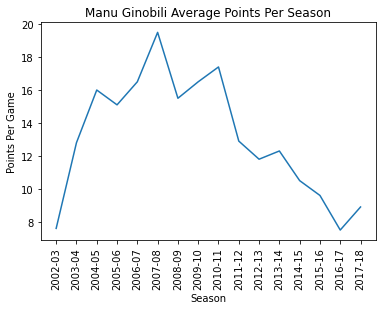

In [23]:
import matplotlib.pyplot as plt

ginobili_statistics = all_seasons_df.loc[all_seasons_df.player_name == 'Manu Ginobili', ['pts','season']]
plt.plot(ginobili_statistics["season"], ginobili_statistics["pts"])
plt.ylabel('Points Per Game')
plt.xticks(rotation=90)
plt.title("Manu Ginobili Average Points Per Season")
plt.xlabel('Season')
plt.show()

9. Sort the dataset descending by rebounds per game and display the top 10 single season performances.

In [24]:
all_seasons_df['pts'].sort_values(ascending=False).head(10)

10507    36.1
4348     35.4
10750    34.3
4007     33.0
2747     32.1
11535    32.0
7952     32.0
4835     31.6
9305     31.6
2631     31.4
Name: pts, dtype: float64

10. What is the highest points per game that Kobe Bryant achieved in a single season?

In [25]:
all_seasons2 = all_seasons_df.loc[all_seasons_df.player_name == 'Kobe Bryant']
all_seasons2['pts'].max()

35.4

**Nivell 2**

- Exercici 2 :

Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).


### Stratified sampling

In [26]:
all_seasons_df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

- The dataset contains the birthplace of each player who has made an NBA team's roster. It could be interesting to see the geographic diversity of the NBA and the influence of foreign talent.  

In [43]:
all_seasons_df['country'].unique()

array(['USA', 'Jamaica', 'Serbia and Montenegro', 'Ukraine', 'Canada',
       'Croatia', 'Lithuania', 'Nigeria', 'Congo',
       'St. Vincent & Grenadines', 'US Virgin Islands', 'France',
       'Slovenia', 'Dominican Republic', 'Germany', 'Georgia',
       'New Zealand', 'Belize', 'England', 'Argentina',
       'U.S. Virgin Islands', 'Greece', 'Senegal', 'China', 'Turkey',
       'Finland', 'Mali', 'Puerto Rico', 'Mexico', 'Yugoslavia', 'Serbia',
       'Spain', 'Venezuela', 'Haiti', 'Russia', 'Ireland', 'Brazil',
       'Scotland', 'Poland', 'Netherlands', 'Czech Republic',
       'Montenegro', 'United Kingdom', 'Democratic Republic of the Congo',
       'Latvia', 'South Korea', 'Uruguay', 'Sudan (UK)', 'Australia',
       'USSR', 'Italy', 'Switzerland', 'Gabon', 'Cameroon', 'Iran',
       'Israel', 'Sweden', 'Tanzania', 'Panama', 'Bosnia',
       'Great Britain', 'Macedonia', 'Bosnia & Herzegovina', 'Cabo Verde',
       'Tunisia', 'South Sudan', 'Bahamas', 'Ghana', 'Austria',
      

In [42]:
all_seasons_df['country'].value_counts()

USA                    9836
France                  167
Canada                  161
Brazil                   83
Australia                83
                       ... 
USSR                      2
Ghana                     1
Trinidad and Tobago       1
Sudan (UK)                1
Guinea                    1
Name: country, Length: 79, dtype: int64

- First, we eliminate countries that have contributed a single player because the smallest class must contain at least 2 members to generate a stratified sample.
> ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [44]:
main_influential_countries_df = all_seasons_df.groupby("country").filter(lambda g: g.country.size >= 2)

In [61]:

main_influential_countries_df['country'].value_counts().head(10)

USA          9836
France        167
Canada        161
Spain          83
Australia      83
Brazil         83
Slovenia       70
Turkey         67
Croatia        66
Argentina      62
Name: country, dtype: int64

In [62]:
# Another alternative to do the same:
cnt = all_seasons_df.country.value_counts()
v = cnt[(cnt.index != 0) & (cnt >= 2)].index.values
out_df = all_seasons_df.query("country in @v")
out_df['country'].value_counts().head(10)

USA          9836
France        167
Canada        161
Spain          83
Australia      83
Brazil         83
Slovenia       70
Turkey         67
Croatia        66
Argentina      62
Name: country, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(main_influential_countries_df, test_size = 0.20, stratify = main_influential_countries_df[['country']])
Xtrain

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10008,Pascal Siakam,TOR,24.0,205.74,104.326160,New Mexico State,Cameroon,2016,1,27,...,7.3,4.5,2.0,8.9,0.048,0.168,0.154,0.549,0.133,2017-18
7799,DeMarcus Cousins,SAC,23.0,210.82,122.469840,Kentucky,USA,2010,1,5,...,22.7,11.7,2.9,-1.9,0.109,0.309,0.326,0.555,0.175,2013-14
9974,Kyle O'Quinn,NYK,28.0,208.28,113.398000,Norfolk State,USA,2012,2,49,...,7.1,6.1,2.1,-1.1,0.090,0.242,0.168,0.625,0.166,2017-18
3905,Jermaine O'Neal,IND,26.0,210.82,109.769264,None,USA,1996,1,17,...,24.3,8.8,1.9,0.3,0.066,0.225,0.360,0.520,0.124,2004-05
2804,Rod Strickland,MIN,36.0,190.50,83.914520,DePaul,USA,1988,1,19,...,6.8,2.0,4.6,2.5,0.025,0.090,0.191,0.492,0.351,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6247,Manny Harris,CLE,21.0,195.58,83.914520,Michigan,USA,Undrafted,Undrafted,Undrafted,...,5.9,2.6,1.6,-12.6,0.042,0.137,0.189,0.486,0.153,2010-11
4763,Zydrunas Ilgauskas,CLE,32.0,220.98,117.933920,None,Lithuania,1996,1,20,...,11.9,7.7,1.6,4.6,0.128,0.204,0.218,0.527,0.099,2006-07
2538,Dan Majerle,PHX,36.0,198.12,100.697424,Central Michigan,USA,1988,1,14,...,4.6,2.7,1.4,1.9,0.026,0.142,0.129,0.490,0.112,2001-02
9919,Tyler Dorsey,ATL,22.0,195.58,83.007336,Oregon,USA,2017,2,41,...,7.2,2.3,1.4,-7.1,0.016,0.112,0.193,0.494,0.128,2017-18


In [48]:
Xtrain['country'].unique()

array(['Cameroon', 'USA', 'Ukraine', 'Canada',
       'Democratic Republic of the Congo', 'Jamaica', 'Germany',
       'Slovenia', 'Brazil', 'U.S. Virgin Islands', 'Senegal', 'France',
       'Australia', 'Turkey', 'US Virgin Islands', 'Serbia',
       'New Zealand', 'Poland', 'Lithuania', 'Finland', 'Spain',
       'Croatia', 'Argentina', 'Panama', 'Serbia and Montenegro',
       'England', 'Russia', 'Austria', 'Bosnia', 'Bosnia and Herzegovina',
       'Puerto Rico', 'Italy', 'Tunisia', 'Mexico', 'Mali',
       'Dominican Republic', 'Yugoslavia', 'China', 'Montenegro',
       'Latvia', 'Switzerland', 'Bahamas', 'Nigeria', 'Georgia',
       'St. Vincent & Grenadines', 'Greece', 'Netherlands', 'Haiti',
       'Cabo Verde', 'Ireland', 'Venezuela', 'South Sudan',
       'United Kingdom', 'Tanzania', 'Sweden', 'Congo', 'South Korea',
       'Israel', 'Sudan', 'Belize', 'Scotland', 'Bosnia & Herzegovina',
       'Saint Lucia', 'Czech Republic', 'Iran', 'Japan', 'Gabon',
       'Uruguay', '

In [49]:
Xtrain['country'].describe()

count     9356
unique      75
top        USA
freq      7868
Name: country, dtype: object

### Sampling using the synthetic minority oversampling technique (SMOTE).

In [59]:
import imblearn
from imblearn.over_sampling import SMOTE

In [128]:
smote_all_seasons_df = all_seasons_df[(all_seasons_df['country'] == 'USA') | (all_seasons_df['country'] == 'Argentina')]
smote_all_seasons_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,Matt Thomas,UTA,26.0,193.04,86.182480,Iowa State,USA,Undrafted,Undrafted,Undrafted,...,3.1,1.0,0.4,-9.3,0.020,0.112,0.187,0.522,0.096,2020-21
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21


In [129]:
smote_all_seasons_df['country'].unique()

array(['USA', 'Argentina'], dtype=object)

In [130]:
smote_all_seasons_df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [131]:
cat_cols = ['player_name', 'team_abbreviation', 'college', 'draft_year', 'draft_round', 'draft_number', 'season']
num_cols = ['age', 'player_height', 'player_weight', ]'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', \
    'usg_pct', 'ts_pct', 'ast_pct'

In [132]:
smote_all_seasons_df[num_cols].head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,213.36,106.59412,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052
1,27.0,210.82,106.59412,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000
2,30.0,208.28,106.59412,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099
3,29.0,210.82,111.13004,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101
4,22.0,205.74,106.59412,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114


In [133]:
smote_all_seasons_df[cat_cols].head()

,player_name,team_abbreviation,college,draft_year,draft_round,draft_number,season
0,Travis Knight,LAL,Connecticut,1996,1,29,1996-97
1,Matt Fish,MIA,North Carolina-Wilmington,1992,2,50,1996-97
2,Matt Bullard,HOU,Iowa,Undrafted,Undrafted,Undrafted,1996-97
3,Marty Conlon,BOS,Providence,Undrafted,Undrafted,Undrafted,1996-97
4,Martin Muursepp,DAL,None,1996,1,25,1996-97


In [136]:
smote_sampling_all_seasons_df = smote_all_seasons_df.drop(columns = cat_cols)


In [138]:
smote_sampling_all_seasons_df.head()

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,213.36,106.59412,USA,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052
1,27.0,210.82,106.59412,USA,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000
2,30.0,208.28,106.59412,USA,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099
3,29.0,210.82,111.13004,USA,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101
4,22.0,205.74,106.59412,USA,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114


In [139]:
smote_sampling_all_seasons_df['country'] = [0 if x == 'USA' else 1 for x in smote_sampling_all_seasons_df['country']]

In [141]:
smote_sampling_all_seasons_df.head()

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,213.36,106.59412,0,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052
1,27.0,210.82,106.59412,0,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000
2,30.0,208.28,106.59412,0,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099
3,29.0,210.82,111.13004,0,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101
4,22.0,205.74,106.59412,0,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114


In [142]:
smote_sampling_all_seasons_df['country'].value_counts()

0    9836
1      62
Name: country, dtype: int64

In [154]:
smote_sampling_all_seasons_df['country'].describe().apply("{0:.3f}".format)

count    9898.000
mean        0.006
std         0.079
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: country, dtype: object

In [151]:
smote_sampling_all_seasons_df.describe()

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000,9898.000
mean,27.255,199.774,99.566,0.006,51.318,8.166,3.454,1.836,-2.317,0.053,0.138,0.186,0.508,0.134
std,4.345,8.909,12.263,0.079,25.214,6.000,2.413,1.801,11.965,0.044,0.061,0.053,0.099,0.095
min,18.000,160.020,60.328,0.000,1.000,0.000,0.000,0.000,-200.000,0.000,0.000,0.000,0.000,0.000
25%,24.000,193.040,90.718,0.000,31.000,3.500,1.700,0.600,-6.400,0.021,0.094,0.150,0.477,0.067
50%,27.000,200.660,99.790,0.000,57.000,6.700,2.900,1.200,-1.500,0.039,0.127,0.182,0.520,0.105
75%,30.000,205.740,108.862,0.000,74.000,11.500,4.600,2.475,3.000,0.081,0.175,0.218,0.555,0.183
max,44.000,231.140,155.582,1.000,85.000,36.100,16.300,11.700,300.000,1.000,1.000,1.000,1.500,1.000


In [145]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(smote_sampling_all_seasons_df, smote_sampling_all_seasons_df['country'])

In [146]:
X_sm

,age,player_height,player_weight,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.000000,213.360000,106.594120,0,71,4.800000,4.500000,0.500000,6.200000,0.127000,0.182000,0.142000,0.536000,0.052000
1,27.000000,210.820000,106.594120,0,6,0.300000,0.800000,0.000000,-15.100000,0.143000,0.267000,0.265000,0.333000,0.000000
2,30.000000,208.280000,106.594120,0,71,4.500000,1.600000,0.900000,0.900000,0.016000,0.115000,0.151000,0.535000,0.099000
3,29.000000,210.820000,111.130040,0,74,7.800000,4.400000,1.400000,-9.000000,0.083000,0.152000,0.167000,0.542000,0.101000
4,22.000000,205.740000,106.594120,0,42,3.700000,1.600000,0.500000,-14.500000,0.109000,0.118000,0.233000,0.482000,0.114000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19667,29.297456,205.991846,111.130040,1,81,11.877038,8.393477,1.440509,4.847032,0.100380,0.230521,0.187555,0.572297,0.082207
19668,33.438226,207.166906,110.136161,1,82,6.027033,5.024710,1.112355,0.661774,0.092786,0.218967,0.165093,0.566795,0.097012
19669,28.123002,198.120000,94.050599,1,75,16.356028,4.659225,4.171525,8.700000,0.037692,0.137023,0.250968,0.576337,0.238699
19670,25.000000,199.241349,103.324910,1,81,8.735114,4.576590,1.667557,-1.230789,0.039883,0.187973,0.191532,0.508017,0.114351


In [147]:
X_sm['country'].value_counts()

0    9836
1    9836
Name: country, dtype: int64

**Nivell 3**

- Exercici 3 :

Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

In [155]:
all_seasons_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.000,213.360,106.594,Connecticut,USA,1996,1,29,...,4.800,4.500,0.500,6.200,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.000,210.820,106.594,North Carolina-Wilmington,USA,1992,2,50,...,0.300,0.800,0.000,-15.100,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.000,208.280,106.594,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.500,1.600,0.900,0.900,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.000,210.820,111.130,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.800,4.400,1.400,-9.000,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.000,205.740,106.594,None,USA,1996,1,25,...,3.700,1.600,0.500,-14.500,0.109,0.118,0.233,0.482,0.114,1996-97


[Reservoir Sampling](https://mlwhiz.com/blog/2019/07/30/sampling/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)

In [158]:
import random

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = all_seasons_df['gp']

k=100
reservoir = []
for i, element in enumerate(all_seasons_df['gp']):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
           # Select item in stream and remove one of the k items already selected
           reservoir[random.choice(range(0,k))] = element

In [164]:
print(reservoir)

[74, 52, 82, 24, 66, 4, 25, 24, 56, 70, 19, 72, 33, 80, 80, 75, 78, 10, 8, 70, 3, 76, 80, 15, 66, 77, 62, 66, 72, 47, 67, 2, 52, 76, 43, 75, 32, 13, 30, 8, 82, 13, 66, 52, 69, 70, 76, 51, 81, 5, 22, 34, 81, 9, 82, 57, 67, 62, 75, 54, 34, 59, 74, 72, 68, 72, 16, 46, 79, 42, 61, 20, 4, 33, 68, 47, 62, 38, 55, 60, 48, 78, 78, 81, 76, 66, 67, 79, 5, 82, 68, 78, 80, 44, 13, 48, 73, 3, 41, 38]


In [160]:
len(reservoir)

100

In [163]:
a, b, c = min(reservoir), max(reservoir), sum(reservoir)/len(reservoir)
print('The minimum {}, maximum {} and average number of games played per season are {}.'.format(a, b, c))

The minimum 2, maximum 82 and average number of games played per season are 52.28.


In [179]:
#all_seasons_df.loc[all_seasons_df.player_name == 'Manu Ginobili', ['player_name', 'gp', 'season']]
all_seasons_df.loc[all_seasons_df.player_name == 'LeBron James', ['player_name', 'gp', 'season']]

,player_name,gp,season
3131,LeBron James,79,2003-04
3618,LeBron James,80,2004-05
4333,LeBron James,79,2005-06
4825,LeBron James,78,2006-07
5084,LeBron James,75,2007-08
5444,LeBron James,81,2008-09
5908,LeBron James,76,2009-10
6319,LeBron James,79,2010-11
7102,LeBron James,62,2011-12
7528,LeBron James,76,2012-13


In [180]:
all_seasons_df.player_name.isin(['LeBron James'])

0        False
1        False
2        False
3        False
4        False
         ...  
11695    False
11696    False
11697    False
11698    False
11699    False
Name: player_name, Length: 11700, dtype: bool

- Select rows based on column value:

In [181]:
#To select rows whose column value equals a scalar, some_value, use ==:
all_seasons_df.loc[all_seasons_df['player_name'] == 'LeBron James']

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3131,LeBron James,CLE,19.000,203.200,108.862,None,USA,2003,1,1,...,20.900,5.500,5.900,-2.600,0.035,0.117,0.280,0.488,0.268,2003-04
3618,LeBron James,CLE,20.000,203.200,108.862,None,USA,2003,1,1,...,27.200,7.400,7.200,1.900,0.038,0.170,0.297,0.554,0.324,2004-05
4333,LeBron James,CLE,21.000,203.200,108.862,None,USA,2003,1,1,...,31.400,7.000,6.600,4.200,0.026,0.171,0.336,0.568,0.315,2005-06
4825,LeBron James,CLE,22.000,203.200,108.862,None,USA,2003,1,1,...,27.300,6.700,6.000,5.400,0.029,0.166,0.309,0.552,0.281,2006-07
5084,LeBron James,CLE,23.000,203.200,113.398,None,USA,2003,1,1,...,30.000,7.900,7.200,2.400,0.049,0.178,0.333,0.568,0.352,2007-08
5444,LeBron James,CLE,24.000,203.200,113.398,None,USA,2003,1,1,...,28.400,7.600,7.200,14.700,0.042,0.189,0.334,0.591,0.365,2008-09
5908,LeBron James,CLE,25.000,203.200,113.398,None,USA,2003,1,1,...,29.700,7.300,8.600,10.800,0.030,0.185,0.333,0.604,0.398,2009-10
6319,LeBron James,MIA,26.000,203.200,113.398,None,USA,2003,1,1,...,26.700,7.500,7.000,10.500,0.033,0.184,0.312,0.594,0.343,2010-11
7102,LeBron James,MIA,27.000,203.200,113.398,None,USA,2003,1,1,...,27.100,7.900,6.200,10.700,0.050,0.196,0.317,0.605,0.318,2011-12
7528,LeBron James,MIA,28.000,203.200,113.398,None,USA,2003,1,1,...,26.800,8.000,7.300,14.100,0.044,0.208,0.298,0.640,0.344,2012-13


- Select rows whose column value is in an iterable array:

In [178]:
#To select rows whose column value is in an iterable array, which we'll define as array, you can use isin:
array = ['LeBron James', 'Manu Ginobili']
all_seasons_df.loc[all_seasons_df['player_name'].isin(array)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2727,Manu Ginobili,SAS,25.000,198.120,95.254,None,Argentina,1999,2,57,...,7.600,2.300,2.000,6.800,0.039,0.091,0.182,0.556,0.163,2002-03
3131,LeBron James,CLE,19.000,203.200,108.862,None,USA,2003,1,1,...,20.900,5.500,5.900,-2.600,0.035,0.117,0.280,0.488,0.268,2003-04
3169,Manu Ginobili,SAS,26.000,198.120,95.254,None,Argentina,1999,2,57,...,12.800,4.500,3.800,8.700,0.043,0.128,0.217,0.536,0.218,2003-04
3599,Manu Ginobili,SAS,27.000,198.120,92.986,None,Argentina,1999,2,57,...,16.000,4.400,3.900,16.600,0.041,0.136,0.242,0.609,0.217,2004-05
3618,LeBron James,CLE,20.000,203.200,108.862,None,USA,2003,1,1,...,27.200,7.400,7.200,1.900,0.038,0.170,0.297,0.554,0.324,2004-05
4333,LeBron James,CLE,21.000,203.200,108.862,None,USA,2003,1,1,...,31.400,7.000,6.600,4.200,0.026,0.171,0.336,0.568,0.315,2005-06
4426,Manu Ginobili,SAS,28.000,198.120,92.986,None,Argentina,1999,2,57,...,15.100,3.500,3.600,12.100,0.028,0.122,0.245,0.593,0.215,2005-06
4582,Manu Ginobili,SAS,29.000,198.120,92.986,None,Argentina,1999,2,57,...,16.500,4.400,3.500,13.600,0.036,0.153,0.265,0.609,0.223,2006-07
4825,LeBron James,CLE,22.000,203.200,108.862,None,USA,2003,1,1,...,27.300,6.700,6.000,5.400,0.029,0.166,0.309,0.552,0.281,2006-07
5084,LeBron James,CLE,23.000,203.200,113.398,None,USA,2003,1,1,...,30.000,7.900,7.200,2.400,0.049,0.178,0.333,0.568,0.352,2007-08


- Select rows based on multiple column conditions:

In [183]:
#To select a row based on multiple conditions you can use &:
array = ['LeBron James', 'Manu Ginobili']
all_seasons_df.loc[(all_seasons_df['gp'] > 70) & all_seasons_df['player_name'].isin(array)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
3131,LeBron James,CLE,19.000,203.200,108.862,None,USA,2003,1,1,...,20.900,5.500,5.900,-2.600,0.035,0.117,0.280,0.488,0.268,2003-04
3169,Manu Ginobili,SAS,26.000,198.120,95.254,None,Argentina,1999,2,57,...,12.800,4.500,3.800,8.700,0.043,0.128,0.217,0.536,0.218,2003-04
3599,Manu Ginobili,SAS,27.000,198.120,92.986,None,Argentina,1999,2,57,...,16.000,4.400,3.900,16.600,0.041,0.136,0.242,0.609,0.217,2004-05
3618,LeBron James,CLE,20.000,203.200,108.862,None,USA,2003,1,1,...,27.200,7.400,7.200,1.900,0.038,0.170,0.297,0.554,0.324,2004-05
4333,LeBron James,CLE,21.000,203.200,108.862,None,USA,2003,1,1,...,31.400,7.000,6.600,4.200,0.026,0.171,0.336,0.568,0.315,2005-06
4582,Manu Ginobili,SAS,29.000,198.120,92.986,None,Argentina,1999,2,57,...,16.500,4.400,3.500,13.600,0.036,0.153,0.265,0.609,0.223,2006-07
4825,LeBron James,CLE,22.000,203.200,108.862,None,USA,2003,1,1,...,27.300,6.700,6.000,5.400,0.029,0.166,0.309,0.552,0.281,2006-07
5084,LeBron James,CLE,23.000,203.200,113.398,None,USA,2003,1,1,...,30.000,7.900,7.200,2.400,0.049,0.178,0.333,0.568,0.352,2007-08
5095,Manu Ginobili,SAS,30.000,198.120,92.986,None,Argentina,1999,2,57,...,19.500,4.800,4.500,8.700,0.033,0.145,0.281,0.612,0.257,2007-08
5444,LeBron James,CLE,24.000,203.200,113.398,None,USA,2003,1,1,...,28.400,7.600,7.200,14.700,0.042,0.189,0.334,0.591,0.365,2008-09


- Select rows where column does not equal a value:

In [ ]:
#To select rows where a column value does not equal a value, use !=:
all_seasons_df.loc[all_seasons_df['player_name'] != 'LeBron James']

- Select rows whose column value is not in an iterable array:

In [ ]:
#To return a rows where column value is not in an iterable array, use ~ in front of df:
array = ['LeBron James', 'Manu Ginobili']
all_seasons_df.loc[~all_seasons_df['player_name'].isin(array)]

In [176]:
print(all_seasons_df['player_name'].where(all_seasons_df['gp'] > 70))

0        Travis Knight
1                  NaN
2         Matt Bullard
3         Marty Conlon
4                  NaN
             ...      
11695              NaN
11696              NaN
11697              NaN
11698              NaN
11699              NaN
Name: player_name, Length: 11700, dtype: object
